
     ephem1    ephem2   tricho1   tricho2   diptera     coleo     oligo  \
0  0.194487  0.104135  0.047473  0.015314  0.367534  0.042879  0.151608   
1  0.003245  0.000000  0.005840  0.090201  0.007787  0.322518  0.415964   
2  0.099631  0.000000  0.103321  0.033210  0.047970  0.169742  0.060271   
3  0.452954  0.000000  0.038293  0.064551  0.005470  0.234136  0.143326   
4  0.124360  0.021946  0.091441  0.669349  0.022677  0.003658  0.000732   
5  0.027149  0.000000  0.000000  0.000000  0.038462  0.000000  0.039593   
6  0.367424  0.005051  0.093434  0.208333  0.106061  0.002525  0.165404   
7  0.265205  0.002122  0.045262  0.289250  0.011315  0.002122  0.041018   
8  0.000000  0.000000  0.000000  0.026990  0.016609  0.049135  0.099654   
9  0.014657  0.000000  0.000000  0.000000  0.013324  0.000000  0.027315   

      amphi  mollusca  
0  0.041348  0.016845  
1  0.038936  0.114860  
2  0.003690  0.484625  
3  0.029540  0.032823  
4  0.000000  0.063643  
5  0.562217  0.333710  
6  0.

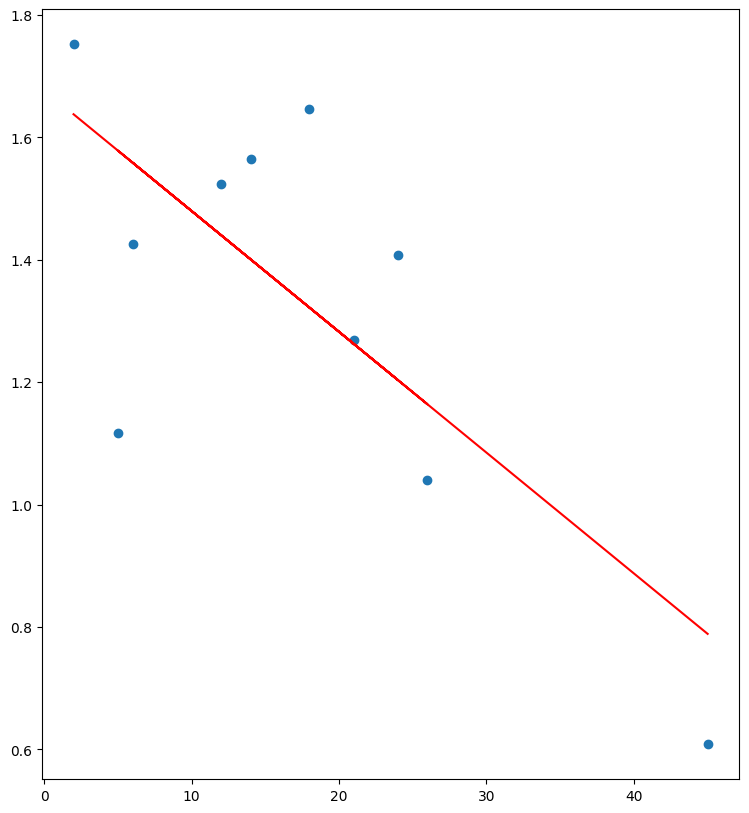

RMSE Error Measurement: 0.21736225839091072

As fine sediment in the streambed increases, Shannon diversity is decreased.        This could be due to sedimentation reducing hiding spots of species.       Additionally, phosphorus is important for the primary production of a system, and they are tied to sediments.       They can be lost through erosion, and more sediment can cause more phosphorus to become tied with sediment.
extrapolated plot: 



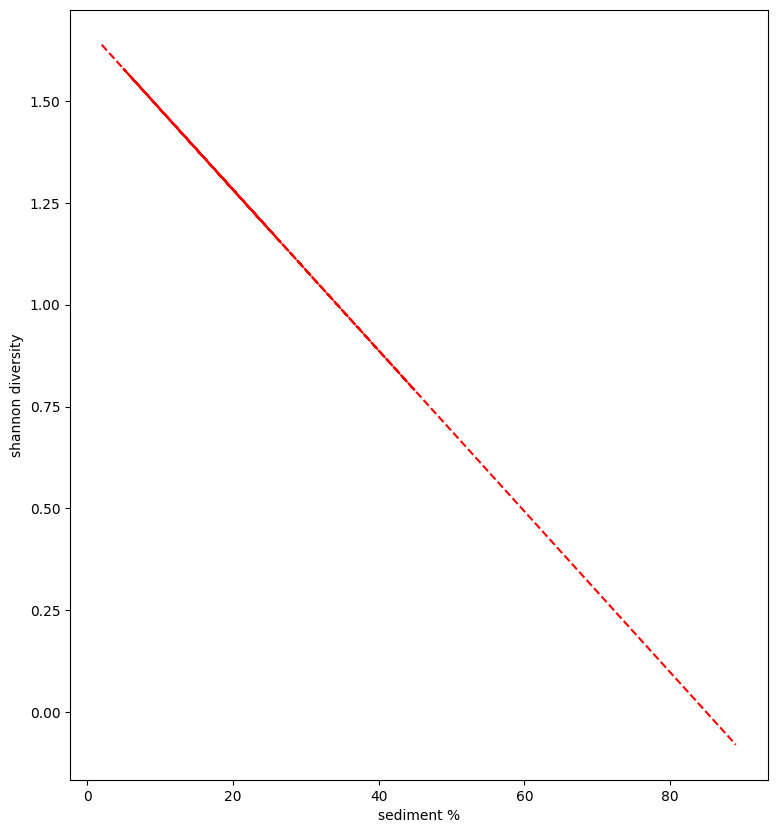

In [ ]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

def get_rmse(line, actual):
    error = [(x-y) for x, y in zip(line, actual)]
    errorsq = [v**2 for v in error]
    return(f'RMSE Error Measurement: {np.sqrt(np.mean(errorsq))}')

data=pd.read_csv('stream_data.csv')

inverts = ['ephem1', 'ephem2', 'tricho1', 'tricho2', 'diptera','coleo', 'oligo', 'amphi','mollusca']

# find proportions
proportions = data[inverts].div(data['total inverts'], axis=0)
print(f'\n{proportions}')

# find natural log
ln = np.log(proportions.where(proportions > 0))
print(ln)

# proportion * ln
ln_proportion = proportions * ln

# summation
print('\nShannon Diversity: ')
sums = -1 * ln_proportion.sum(axis=1)
print(sums)

# correlation
print("\nCorrelation Coefficient: ")
print(sums.corr(data['fine sediment']))

# linear regression
x = data['fine sediment'].values.reshape(-1,1)
y = sums.values.reshape(-1,1)

regressor = LinearRegression()
regressor.fit(x, y)

coef = regressor.coef_[0][0]
intercept = regressor.intercept_[0]

print(f'Coefficent: {coef}\n')
print(f'Intercept: {intercept}\n')
      
# graph
ys = coef * data['fine sediment'] + intercept
fig, ax = plt.subplots(figsize=(9,10))
ax.scatter(x = data['fine sediment'],y = sums)
regressionline = (coef * i + intercept for i in data['fine sediment'])
plt.plot(data['fine sediment'], [coef * i + intercept for i in data['fine sediment']], 'r-', label='Regression Line')
plt.show()

# RMSE ERROR
sumlist = sums.tolist()
print(get_rmse(regressionline, sumlist))

print("\nAs fine sediment in the streambed increases, Shannon diversity is decreased.  \
      This could be due to sedimentation reducing hiding spots of species. \
      Additionally, phosphorus is important for the primary production of a system, and they are tied to sediments. \
      They can be lost through erosion, and more sediment can cause more phosphorus to become tied with sediment.")

# future forecasting
extended = np.append(data['fine sediment'], np.arange(12, 90))
extended = extended.reshape(-1,1)
extended_prediction = regressor.predict(extended)

print("extrapolated plot: \n")
ax.scatter(x = data['fine sediment'],y = sums)
fig, ax = plt.subplots(figsize=(9,10))
plt.plot(extended, extended_prediction, 'r--')
plt.xlabel("sediment %")
plt.ylabel('shannon diversity')
plt.show()